# Titanic data analysis

Sebastian Baeza

Project 2: Udacity Data Analyst Nanodegree


asdasd complete the intro


### Questions For Investigation

 ## 1. What factors made people more likely to survive?

To answer that question, first, we need to obtain some information about the dataset. So, I will describe a descriptive statistical analysis and then some inferences about the factors that probably conducted to survive (or not survive) this event.
 
 
 # 1.a About the dataset
 
In this section we wil see some tendencies, plots and ohter stuff about the dataset.



In [5]:
# import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#load csv into data frame
df_in= pd.read_csv('~/Notebook/project_2/titanic-data.csv')


print 'Data info:'
print(df_in.info())
print('\r\n')

print('Some data description about the numerical columns:')
print(df_in.describe())
print('\r\n')


Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


Some data description about the numerical columns:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000

As we see about the dataset, the "Age" and "Cabin" columns have some "null" data, so i will carefully to work with the rows that have complete data in all those columns when the analysis is about "Age" or "Cabin".

# About the gender

Let's see de "Gender" column also as known as "sex" in the dataset. This about the idea (or social belief) that says "Ladies and children first"

In the dataset are    314 females, 
and    577 males


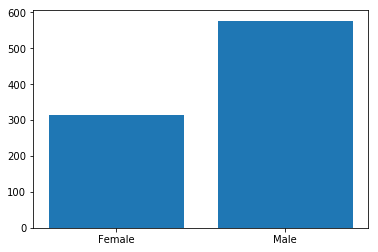

In [61]:
# I choose to separate the gender in two data frames
df_fem = df_in[df_in.Sex == 'female']
df_male = df_in[df_in.Sex == 'male']

fields=['Female', 'Male']
values = [df_fem['Sex'].count(),df_male['Sex'].count()]
y_pos = np.arange(len(fields))

print 'In the dataset are %6.0f females, ' % df_fem['Sex'].count()
print 'and %6.0f males' % df_male['Sex'].count()

# print(fields)
# print(values)

plt.bar(y_pos,values)
plt.xticks(y_pos,fields)
# plt.title("Gender distribution")
# plt.xlabel("Gender")
# plt.ylabel("Count")

plt.show()


If we see the result, there was more males than females. So we can take some views about the female passengers. But before that, i will show some general views about the survivors and age.

In [68]:

# print 'In the dataset are %6.0f females, ' % df_fem['Sex'].count()
# print 'and %6.0f males' % df_male['Sex'].count()

# print(fields)
print(df_in.groupby('Survived').size())
print 'So, '


#plt.bar(y_pos,values)
#plt.xticks(y_pos,fields)
# plt.title("Gender distribution")
# plt.xlabel("Gender")
# plt.ylabel("Count")

#plt.show()

Survived
0    549
1    342
dtype: int64


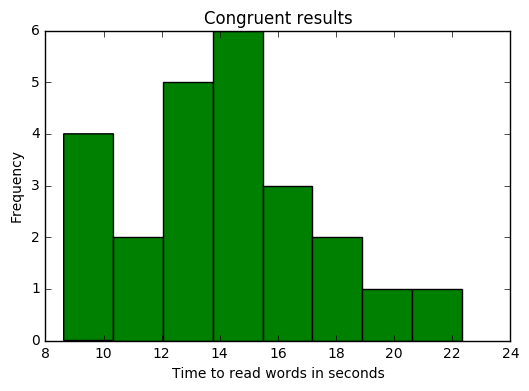

In [21]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#load csv into data frame
fields=['Congruent', 'Incongruent']

df_in= pd.read_csv('C:/cursos/data_sc_nanodegree/project_1/stroopdata.csv', usecols=fields)

plt.hist(df_in['Congruent'], bins=8, color="green")

plt.title("Congruent results")
plt.xlabel("Time to read words in seconds")
plt.ylabel("Frequency")

plt.show()

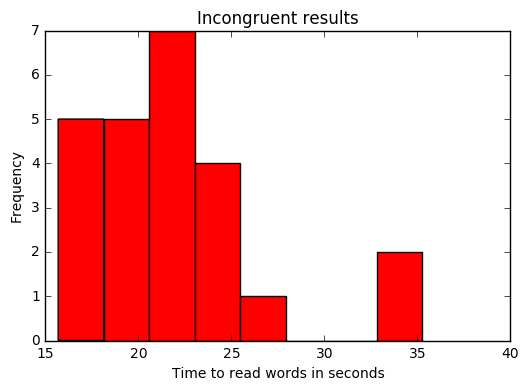

In [3]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#load csv into data frame
fields=['Congruent', 'Incongruent']

df_in= pd.read_csv('C:/cursos/data_sc_nanodegree/project_1/stroopdata.csv', usecols=fields)

plt.hist(df_in['Incongruent'], bins=8, color="red")

plt.title("Incongruent results")
plt.xlabel("Time to read words in seconds")
plt.ylabel("Frequency")

plt.show()

As we see, with the histogram applied in the two versions of the test, we can observe that the notorious difference between minimum time, maximum time and the most repeated frequency on different time measures.

## 5. Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

Implementing the t-test student in python:

In [4]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import math


# load csv into data frame
fields=['Congruent', 'Incongruent']

df_in= pd.read_csv('C:/cursos/data_sc_nanodegree/project_1/stroopdata.csv', usecols=fields)



# creating a column with the difference between the samples
df_in['diff']= df_in['Congruent']-df_in['Incongruent']

# the sample length
diff_length=df_in['diff'].count()

# degree of freedom
deg_free=diff_length-1


# the mean of the difference between the two results
diff_mean=df_in['diff'].mean()

print 'mean of the differences: %6.5f' %diff_mean

# the standard deviation of the difference
diff_stdev=df_in['diff'].std()

# Standard error
std_error=diff_stdev/math.sqrt(diff_length)


# calculing t statistic 

t_stat= (diff_mean)/(std_error)


# applying the scipy function for t-test over two paired datasets
paired_sample = stats.ttest_rel(df_in['Congruent'],df_in['Incongruent'])




#obtaining margin of error
# mar_err= z_crit * (diff_stdev/math.sqrt(diff_length))


# calculating the confidence interval
conf_int=(diff_mean + (paired_sample[0] * (diff_stdev/math.sqrt(diff_length))), diff_mean - (paired_sample[0] * (diff_stdev/math.sqrt(diff_length))))



print 't-statistic = %6.3f pvalue = %6.12f' %  paired_sample

print 'confidence interval with 95 percent : %6.6f , %6.6f' %  conf_int


mean of the differences: -7.96479
t-statistic = -8.021 pvalue = 0.000000041030
confidence interval with 95 percent : -15.929583 , 0.000000


As we see:

The p-value is lower than 0.05, and we have the condition to reject the null hypothesis. 
My conclusion is that the difference between the two datasets (Congruent and Incongruent) is significant. Otherwise, the Stroop effect exists.

Taking the confidence interval (at 95%), the difference between the two datasets average times is (-15.929583 , 0 )


## Reference:

About t-student and python

http://hamelg.blogspot.cl/2015/11/python-for-data-analysis-part-24.html

http://www.scipy-lectures.org/packages/statistics/index.html#hypothesis-testing-comparing-two-groups

http://www.statisticssolutions.com/manova-analysis-paired-sample-t-test/

http://www.statisticshowto.com/when-to-use-a-t-score-vs-z-score/

http://support.minitab.com/en-us/minitab/17/topic-library/basic-statistics-and-graphs/hypothesis-tests/tests-of-means/why-use-paired-t/

Stroop effect:
https://en.wikipedia.org/wiki/Stroop_effect
